# Titanic Survival Prediction
## Main Goals

- Preprocess the dataset
    - Handle missing values
    - Create binary features
    - Use categorical encoding
- Predict whether a passenger survived the Titanic disaster
    - Build, train, and test a model
 

### Context

The sinking of the RMS Titanic on April 15, 1912, was one of the most infamous maritime disasters in history. The ship struck an iceberg during its maiden voyage from Southampton, U.K to New York City, leading to the deaths of more than 1,500 passengers and crew. This tragedy became a focal point for studies on safety and survival, especially given the different outcomes for various groups of people onboard.

This project uses a Titanic dataset from Kaggle to demonstrate key feature engineering techniques and end-to-end workflow for predictive modeling with a real world example.

In [1]:
#Import Necessary Libraries
#There are plenty of helpful libaries available in python that can help us build this model
#For now, let's just use pandas. We can import more libraries as we go.
import pandas as pd

## 1. Data Loading
We'll be using the [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data) dataset. In accordance with Kaggle licenses, please directly visit the Kaggle website and download the `train.csv` dataset for this activity.

We start by loading the training dataset and inspecting the first few rows to ensure the data has been loaded correctly.
Inspecting the data is also important because it allows you to see what exactly you are working with. 

As such, our goal right now is to read the attached `train.csv` dataset into a pandas DataFrame and inspect it.

In [2]:
# Read the dataset to a pandas DataFrame
df = pd.read_csv("train.csv")

# Inspect the dataframe. Using display() will allow us to see the first 5 and the last 5 rows of the data.
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Understanding the Data
#### A crucial step in using data
Displaying the data like this allows us to see the columns and plenty of important information. Note that if you are working with a dataset, and you aren't able to inference what certain columns mean, it helps to view the origin of the dataset and surrounding context. For example, with this dataset coming from kaggle, going to the given website makes it easier to figure out what each column means. 

Let's make note of some important columns and other interesting details.

- Survived - Binary. 1 if they surived, and 0 otherwise.
- Pclass - Categorical. Tells us what class the passenger was in. Note that it also has an ordinal relationship. This means that even though it is categorical, they are ordered in a meaningful way.
- SibSp - The number of siblings or spouses on board with the passenger.
- Parch - The number of parents or children on board with the passenger.
- Cabin - The number of their cabin. Unfortunately, only recorded for those with first class tickets.
- Embarked - Where a passenger got on to the ship. It may seem pointless, but there may be a possible relation between wealth and where they embarked from. C = Cherbourg, Q = Queenstown, S = Southampton.

You'll also notice that some columns might feel unoptimized, redundant, or even unecessary for our purpose of predicting if a specific passenger will survive. It's because of this that we will preprocess the data.


## 2. Preprocessing
We can take some actions to clean the data, and make it better for our predictive model. Lets do this by removing unnecessary columns, addding helpful features, and dropping incomplete rows. 

### New Features
Let's start with specifying whether a given person is female, and whether they are a child. We will create binary features that is easier for our model to work with.

In [3]:
#Here, we create new columns based on boolean expressions, and then represent them as integers.

#Creating a column that returns a 1 if the person is female, and 0 otherwise.
#.astype(int) is responsible for making sure these aren't boolean columns, but rather integer columns.
df['is_female'] = (df['Sex'] == 'female').astype(int)

#Creating a column that returns a 1 if the person is under the age of 13, and 0 otherwise.
df['is_child'] = (df['Age'] < 13).astype(int)

#Now, let's view our changes
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female,is_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


Great! We were able to add the new columns. However, inspecting the first and last 5 columns doesn't tell us much about the children. To double check that there were children, we can use the below line of code.

In [4]:
#This will tell us the total number of children
df['is_child'].sum()

np.int64(69)

### Missing Values Inspection
You'll notice that our new 'is_female' column makes our original 'Sex' column obsolete. Now that we have these features, we should start by adjusting data and removing rows or columns. While it is tempting to simply drop all the rows with null values, we have to consider how much data we would lose, especially with a relatively smaller dataset such as this one.
Let's inspect how many null values we have.

In [5]:
#The total number of null values for each category in the dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
is_female        0
is_child         0
dtype: int64

Checking the total number of null values in the data frame shows that there are a significant amount of missing values in the Cabin column. Considering the large number of null values, and how little we might learn from the cabin number, it is safe to simply drop the entire column from the dataset.

However, Age is also missing a lot of values, but can't be as simply dropped. Dropping each row with a missing age value would mean losing 20% of the data that we have, and as such, we have to considering imputing the data, or filling in the value with either the mean, median, or mode. With something that could potentially have a lot of outliers, imputing the median for age would allow us to still use those rows for training the model. 

Additionally, while less consequential since only two rows are missing it, imputing the mode for Embarked would work the best, since we can't get the mean or median categorical data.

### Dropping Null Columns and Imputing Missing Values

To clean the data, we will drop irrelevant columns (cabin, sex, name, passenger ID, and ticket) and fill in the remaining missing data.

In [6]:
#Fill missing values

#Here, we fill the missing age value with the median. 
df['Age'] = df['Age'].fillna(df['Age'].median())

#For the Embarked category, we return the mode. Since mode() will return a list of values, .mode[0] will return just one.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#Drop irrelevant columns 
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex'], axis=1)
#Note that if you're running this codeblock again, be sure to comment out the line, as these values have already been dropped

#Inspect our dataframe with the new changes
display(df)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,is_female,is_child
0,0,3,22.0,1,0,7.2500,S,0,0
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,0
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,28.0,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,0


Now we have a dataset that's almost ready to be used in a model. You may notice that Embarked is still a string, which can cause issue for any models we try to build. Most models have a tough time reading strings, but simply giving those letters values, such as S = 1 and C = 2, might cause issues, as the model might interpret Southamptom as a more valuable location. 

### One-Hot Encoding
A solution to this problem is to one-hot encode the columns. One-hot encoding makes a new column for every category in a categorical column. In these new columns, if a person embarked from a certain location, there will be a 1 under the column that represents their port. Another way to think about it is that of the three columns, only one will be true per row. Doing this will help the model read the data without issues.

Fortunately for us, pandas already has a function to do this.
Something to be careful of us that pd.get_dummies() will create boolean columns. Adding .astype(int) to the end however will make other features like Age and Fare integers too. We will have encode the columns, then identify them, and turn on those into integers.

In [7]:
#One-hot encode 'Embarked'. pd.get_dummies does the encoding, and replaces the original column.
df = pd.get_dummies(df, columns=['Embarked'])

#Now we could single out the columns and simply cast them as ints, but lets do it in a way where it would work for a number of columns
#This code takes advantage of how we can scour through Lists in Python. This is called list comprehension.
#Searches the columns until we find anything that starts with 'Embarked_'. This avoids hard coding. 
embarked_cols = [col for col in df.columns if col.startswith('Embarked_')]

#Convert ONLY those columns to int
df[embarked_cols] = df[embarked_cols].astype(int)

#Inspect the changes to the data
display(df)

,Survived,Pclass,Age,SibSp,Parch,Fare,is_female,is_child,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,0,1,0,0


## 3. Visualization

Before we go ahead and create the model, it'll help to create graphs and plots to analyze the data further and better understand it. This way, we can identify any relationships between features and survival (our target).

For these visualizations, we will be using the seaborn and matplotlib libraries. They work well together, and are commonplace for python graphs.


In [8]:
#Import necessary Libraries

#Currently having an issue where seaborn refuses to install permanently. 
#%pip install seaborn fixes this. Use if necessary.
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Survival Rate by Sex
Let's examine how survival rates differed between male and female passengers using a bar plot.

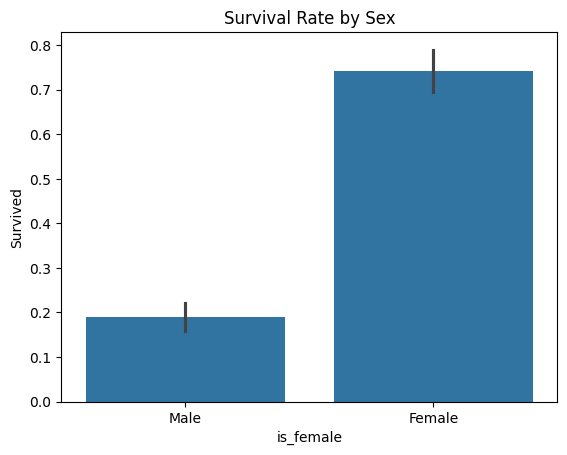

In [9]:
#Use seaborn to define the bar plot
sns.barplot(x='is_female', y='Survived', data=df)

#Specify that it's between Male and Female for greater clarity
plt.xticks([0,1], ['Male', 'Female'])

#Give the graph a title, and display it
plt.title('Survival Rate by Sex')
plt.show()


### Children Survival Rate

Examine how children may have been prioritized for safety.


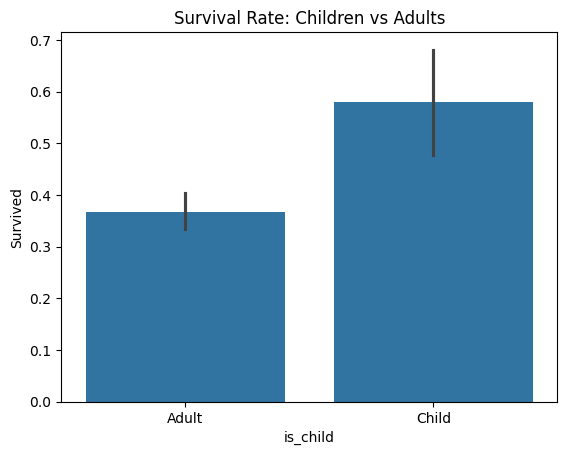

In [10]:
#Creating a bar plot, showing the relationship between being a kid and surviving
sns.barplot(x='is_child', y='Survived', data=df)

#Specify the x axis for clarity
plt.xticks([0,1], ['Adult', 'Child'])
plt.title('Survival Rate: Children vs Adults')
plt.show()


### Age Distribution by Survival

Examine which ages were more likely to survive the disaster. Creating a box plot here would not be ideal, but we can use a histogram in a similar manner to show the frequency of survivals with certain age ranges.

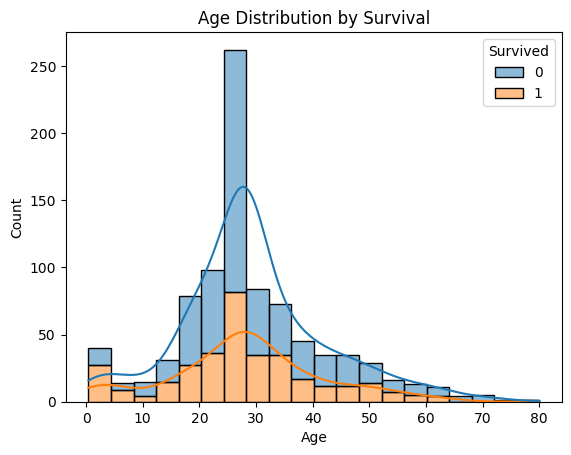

In [11]:
#Creating a histogram through Seaborn. We specify a different color, or "hue" for those who survived.
#KDE = true, creates a smooth line that might help us better visualize the distributions than the bars
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()


### Survival Rate by Passenger Class

Did ticket class affect a passenger's chance of survival?

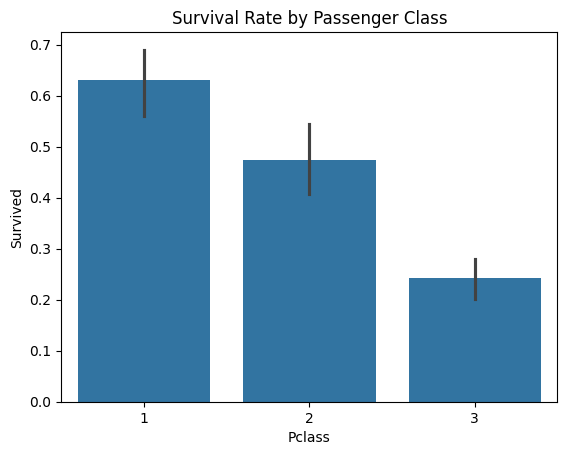

In [12]:
#Use another bar plot to graph the relationship. Bar plots help with small number of features.
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


### Fare Distribution by Survival

Did the cost of a ticket correlate in any way to survival? We can use a histogram for this as well

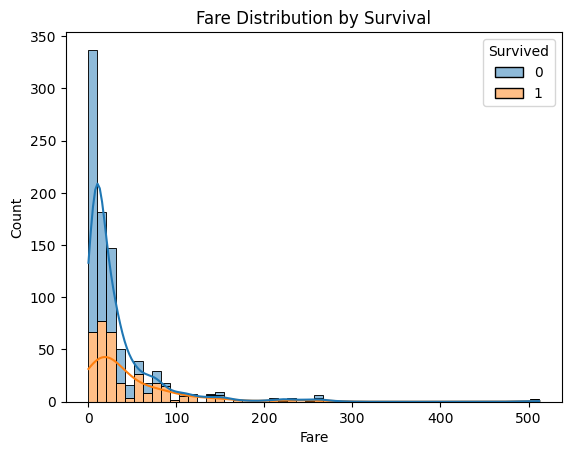

In [13]:
#Creating the histogram for Fare.
sns.histplot(data=df, x='Fare', hue='Survived', bins=50, kde=True, multiple='stack')
plt.title('Fare Distribution by Survival')
plt.show()


### Survival Rate by Embarked Ports

Did the port the passenger embarked correlate to survival, possibly through other factors such as wealth?


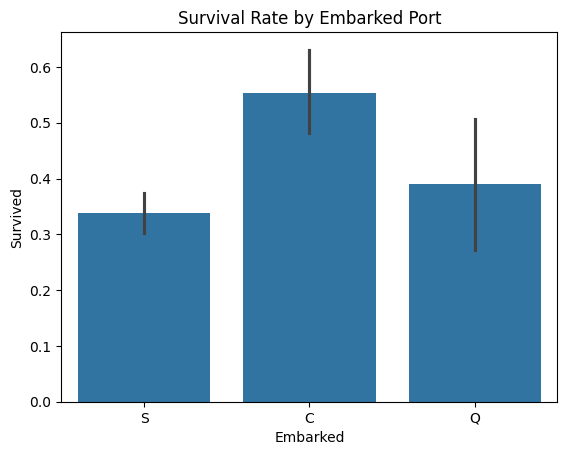

In [14]:
#While having it one-hot encoded helps for the model, it creates some extra work for the graph. 
#We end up backtracking here to temporarily undo the encoding for the graph, which is why when creating your own projects,
#it is often better to graph before encoding. For learning purposes, related parts like this are sectioned together.

#Create a copy of the columns we want
embarked = df[['Survived', 'Embarked_S', 'Embarked_Q']].copy()

#Default every value to C. Could be S or Q, but we arbitrarily chose C here
embarked['Embarked'] = 'C'  

#If the one-hot encoded column is 1, then change the location from C to either S or Q
embarked.loc[embarked['Embarked_S']==1, 'Embarked'] = 'S'
embarked.loc[embarked['Embarked_Q']==1, 'Embarked'] = 'Q'


sns.barplot(x='Embarked', y='Survived', data=embarked)
plt.title('Survival Rate by Embarked Port')
plt.show()


### Graph Analysis
 
These graphs tell us a lot about this data, and we can expect the model to consider. 

- It is known that women and children were prioritized in lifeboats and in other forms of care, so the survival rate of women and children are much higher than men, and those over 13, and that is represented in the graphs as well. 
- While it seems like those between ages 20 and 30 were more likely to survive, the histogram also informs us that most deaths were also between those ages. The age distribution of those who lived and those who died tells us that there were more people between those age ranges in general, though much more of them unfortunately passed away as opposed to survived compared to other ages.
- Those with higher class tickets were more likely to survive, likely meaning that wealthy individuals were also prioritized to be sent to safety
-  While the fare distribution seems to tell us that there were simply more people who paid cheaper pictures, also notice that far fewer of those who paid for more expensive tickets passed away, even if there were less of them to begin with.
-  Those who departed from Cherbourg were more likely to survive. More research online reveals that many of the first class passengers arrived onto the boat from Cherbourg. This is once again an indication that wealth was a prominent factor in survival


From the data gained from these graphs, we can say that being a women, a child, or wealthy were key indicators to survival.

## 4. Splitting the Data Into Features and Target
We’re now at a crucial step: splitting the data into features (what we use to predict) and the target (what we’re trying to predict). In this case, our target is whether or not a passenger survived.

It’s important to note that the model will only be trained on the features, and will never actually “see” the target column when making predictions. By keeping these separate, we can accurately measure how well our model performs.

In [15]:
#Splitting the Data into Features and Target

#We'll use all columns except 'Survived' as our features, and store them into a variable X
X = df.drop('Survived', axis=1)

#The target, y, is the 'Survived' column itself
y = df['Survived']

#Let's take a quick look to confirm our splits. Using .head() gives us just the first 5 rows.
display(X.head())

display(y.head())

,Pclass,Age,SibSp,Parch,Fare,is_female,is_child,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,0,0,1


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Looking at the first few rows of X and y, we can confirm that our features now include all the columns we’ve engineered, and our target is just the Survived column. This separation ensures the model won’t “cheat” by seeing the answers while learning, and is a crucial step in building machine such models.

## 5. Train-Test Split
In machine learning, it’s best practice to not train your model on all of your data. Instead, we split the data into two groups: one for training, and one for testing (or validation). This helps us see how well our model generalizes to data it’s never seen before.

For this, we'll import a part of the scikit-learn library. Also known as Sklearn, it provides plenty of tools that will help us build this prediction model, and has many modules for specific tasks
We’ll use scikit-learn’s train_test_split function to randomly split our dataset. By default, we’ll use 80% for training and 20% for validation.
While we are at it, we will import the other modules we will need in order to build the model later on.

In [16]:
#Import necessary libraries, or in this case, the necessary modules from sklearn

#Import the train_test_split function from sklearn for 80-20 split.
from sklearn.model_selection import train_test_split

#Import the LogisticRegression model from sklearn for when we build the predictive model
from sklearn.linear_model import LogisticRegression

#Import useful metrics for evaluation later on
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Now that we have our modules, we will split our data set for training and validation

In [17]:
#Split the data: 80% training, 20% validation
#Setting random_state ensures we get the same split every time we run this
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=64)

#X_train: This is the training set's features (all columns except Survived), 
#and it's what the model will use to learn patterns during training.

#X_val: This is the validation set's features. The model will use this set (unseen during training) 
#to predict survival, helping us check if the model can generalize.

#y_train: These are the true labels (Survived column) for the training data. 
#The model uses this to compare its guesses and update itself as it learns.

#y_val: These are the true labels for the validation data, 
#which we'll use to see how accurate the model's predictions are on new passengers.


#Let's check the size of our splits
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])

Training set size: 712
Validation set size: 179


### Analysis of the Split
- Here we can see the number of samples in both our training and validation sets.
- This gives us confidence that our data is being split properly. Most of it will be used for training, but a good chunk is set aside for unbiased testing.
- This step helps ensure our model is learning general patterns, not just memorizing the data.

## 6. Building and Training the Model
After all of that prep work, it’s time to build our first predictive model. For this model, we'll be using a Logistic Regression model, a classic algorithm for binary classification problems like this one.

Logistic Regression is a solid starting point for predicting whether a passenger survived or not. It’s quick, easy to interpret, and often provides a strong baseline for comparison with more advanced models.

Here, we can also see the benefits of python libraries, as we can take advantage of Sklearn to build the model in just a line.

In [18]:
#Create the model. max_iter makes sure we give it enough time to converge. We'll use the same random states from before as well.
model = LogisticRegression(max_iter=1000, random_state=64)

Setting max_iter=1000 when creating our logistic regression model tells the algorithm how many times it’s allowed to update its internal weights as it tries to “learn” from the data. In other words, this parameter sets an upper limit on the number of optimization steps during the training process. At this point, it may have given heavier weights to features like is_female, is_child, and ticket class as opposed to other features. But it first has to try and give all the features certain weights to reach upon the conclusion that heavier weights on is_female, is_child, and ticket class for example, is optimal.

Sometimes, especially with real-world or larger datasets, the model might need more time to find the best solution. If the number of iterations allowed is too low (the default is 100 for scikit-learn), the algorithm may stop before it has fully “figured things out,” and you’ll see a warning that the model didn’t converge. By increasing max_iter to 1000, we’re making sure the model has enough chances to finish learning properly, which helps us avoid unnecessary convergence warnings and ensures we get reliable results.

When we say that a model converges, we mean that it is gone through enough interations to determine that a specific set of weights is optimal. At that point of convergence, any other combination of weights and giving certain features more consideration will not change the optimal solution. The more iterations it's given, the more likely it is that the model will converge, and "finish learning."

### Training
Now that we have our model ready, let’s fit, or train, it on our training data. This step is where the model “learns” from the historical data and tries to find patterns that help it predict survival.

In [19]:
#Fit the model on the training data. Thankfully, also not a lot of work thanks to Sklearn. Thank you Python.
model.fit(X_train, y_train)

#Once fit, the model has now “seen” our training data and can make predictions

LogisticRegression(max_iter=1000, random_state=64)

## 7. Evaluating the model

At this point, the model has been built and trained. It has learned from our processed data, and ideally has found the best weights that will predict the survival of a passenger. However, it is important to make sure to test the model now, as there is a chance the model might have just "memorized" the data as opposed to "learning" from it. For a Computer Science student, it's the difference between hard coding a new idea, and implementing dynamic code for it.

So, let's put our model up against the 20% of the data we left aside earlier.

In [20]:
#Make predictions on the validation set, and store it in a variable. y was originally the surival column, and as such, our target column.
y_pred = model.predict(X_val)

#Check the accuracy of our predictions
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

#Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

#Print the classification report for more details
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.8324022346368715
Confusion Matrix:
 [[89 17]
 [13 60]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       106
           1       0.78      0.82      0.80        73

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



### Validation Accuracy
The accuracy score is a simple, overall measure of how often our model got the prediction right. It’s just the percentage of total passengers where the model’s guess matched the actual outcome of whether they would have survived or not. While a high accuracy feels good, it doesn’t always mean the model is truly performing well, especially in situations where one class is much more common than the other (for example, if far more passengers died than survived). In those cases, a model could still “cheat” by always guessing the most frequent class and still get a deceptively high accuracy. That’s why it’s important to also look at other metrics.

### Confusion Matrix
The confusion matrix gives us a more detailed breakdown of how our model’s predictions match up against the actual outcomes, showing us not just how many were right, but what kind of right and wrong predictions the model made. Each cell in the matrix counts a specific scenario:

- Top-left (True Negatives): We predicted “not survived” and they really didn’t survive.

- Bottom-right (True Positives): We predicted “survived” and they really did survive.

- Top-right (False Positives): We predicted “survived” but they actually did not survive (a “false alarm”).

- Bottom-left (False Negatives): We predicted “not survived” but they actually did survive.

If most of the counts are along the diagonal from top-left to bottom-right, which thankfully it is, the model is making correct predictions most of the time. The confusion matrix is a quick visual tool to help us understand both where our model does well and where it’s making mistakes.

Note that this configuration is how Sklearn gives us the confusion matrix, where the left column is what the model predicts to be 0, the right column is what it predicts to be 1, and the top and bottom rows being whether it is actually 0 or 1 respectively. Because of that, our true positives ended up on the bottom right, but may often be in the top left for other confusion matrices. 

We still have one more test that we did to make sure the model is performing as expected.

### Classification Report
The classification report goes deeper than accuracy by calculating three key metrics for each class (survived and not survived):

- Precision: Of all the passengers the model predicted as survived, what fraction actually survived? High precision means few “false alarms.”

- Recall: Of all the passengers who really survived, what fraction did our model correctly identify? High recall means we’re catching most of the true survivors.

- F1-score: This is a single number that balances precision and recall. It’s useful when you want a summary of model performance, especially if the classes are imbalanced.


By looking at these metrics, we can spot if our model is favoring one class over another (for example, predicting “not survived” almost every time). The classification report helps us see whether the model is genuinely learning meaningful patterns or just playing it safe with the majority class.

#### Report Analysis
- Overall Accuracy: The model achieved an accuracy of 0.83 (83%), meaning it correctly predicted the survival outcome for 83% of the passengers in the validation set.

- Precision and Recall for Each Class:

    - Class 0 (Did not survive):

    - Precision: 0.87 — Of all passengers predicted not to survive, 87% really did not survive.

    - Recall: 0.84 — Of all passengers who actually did not survive, the model found 84% of them.

    - F1-score: 0.86 — A strong balance between precision and recall for this class.

- Class 1 (Survived):

    - Precision: 0.78 — Of all passengers predicted to survive, 78% really survived.

    - Recall: 0.82 — Of all passengers who actually survived, the model correctly found 82% of them.

    - F1-score: 0.80 — Still solid, but a bit lower than class 0.

- Support:

    - There were 106 passengers who did not survive and 73 who survived in your validation set.

    - The model is working with a moderately imbalanced dataset (more not survived than survived).

- Macro avg / Weighted avg:

    - Both are 0.83 for f1-score, showing balanced performance across both classes.
 
This means that the model is slightly better at predicting who did not survive than who did, but it still does a good job finding survivors.

The high precision and recall for both classes mean that the model is not just defaulting to the majority class, it's making meaningful, balanced predictions.

F1-scores being close between classes means the model isn’t neglecting either group.

Overall? The model is doing well. At this point, congratulations! You have successfully built a predictive model that will predict whether a person would survive the Titanic disaster based on several features. 

## 8. Predicting Survival for a New Passenger

While this disaster happened over a century ago, lets have some fun with our newly created model and try to predict the chances of a new passenger surviving. This will also serve as a demonstration of how a predictive model like this might be used in practice.

Let's start by creating our hypothetical new passenger.

For this, we'll input a dictionary that will represent the features of this passenger.

In [21]:
#Let's define a hypothetical new passenger
#We'll use the same order of features as our training data
#[Pclass, Age, SibSp, Parch, Fare, is_female, is_child, Embarked_C, Embarked_Q, Embarked_S]

#These are the columns, in order
feature_names = X.columns.tolist()

#Your new passenger's data as a dictionary
new_passenger_dict = {
    'Pclass': 3,
    'Age': 19,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'is_female': 0,
    'is_child': 0,
    'Embarked_C': 0,
    'Embarked_Q': 0,
    'Embarked_S': 1
}#A 19 year old male in 3rd class from Southampton.


#Create DataFrame with correct columns
new_passenger_df = pd.DataFrame([new_passenger_dict])

#Now predict. Our new passenger is the first row.
pred = model.predict(new_passenger_df)
print("Predicted Survival (1=Survived, 0=Not Survived):", pred[0])


Predicted Survival (1=Survived, 0=Not Survived): 0


And with that, we were able to predict whether a hypothetical passenger, one that the Titanic hasn't seen before would survive. In our example, our new passenger unfortunately is unlikely to survive.

Throughout this project, we walked through every essential step for building a predictive model, from cleaning and preparing the Titanic dataset, to engineering meaningful features, and finally training and evaluating a logistic regression classifier. By handling missing values, encoding categorical data, and creating binary features, we set the stage for our model to learn real, underlying patterns in the data.

But why does this process matter? Using machine learning models like the one we built allows us to uncover relationships and make informed predictions that would be difficult or even impossible by hand. These techniques aren’t just for competitions or homework, they’re fundamental in many industries, predicting disease in healthcare, detecting fraud in finance, and for safety systems in transportation, to name just a few.

By learning how to preprocess data, engineer features, and evaluate models, we gain valuable tools for tackling real-world problems where the solution isn’t obvious and the data is messy. The skills and workflow we practiced here apply to almost any modern data science project. Going forward, we could experiment with more advanced models, tune hyperparameters, or deploy our work to make predictions on brand new data, all building on the solid foundation we’ve established in this project.